In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D
import numpy as np
from tensorflow.keras import Sequential
from keras import utils
import os
import PIL.Image
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
dirs=os.listdir('flowers/')

for dir in dirs:
    files=list(os.listdir('flowers/'+dir))
    print(dir + " folder has " + str(len(files)) + 'flowers')

daisy folder has 764flowers
dandelion folder has 1052flowers
rose folder has 784flowers
sunflower folder has 733flowers
tulip folder has 984flowers


In [3]:
dirs

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [25]:
base_path='flowers/'
batch_size=32
image_size=180

In [27]:
train_ds=keras.utils.image_dataset_from_directory(
    base_path,
    batch_size=batch_size,
    image_size=(image_size, image_size),
    seed=123,
    validation_split=0.2,
    subset='training',
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [29]:
val_ds=keras.utils.image_dataset_from_directory(
    base_path,
    batch_size=batch_size,
    image_size=(image_size, image_size),
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [31]:
flower_name=train_ds.class_names

In [33]:
flower_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

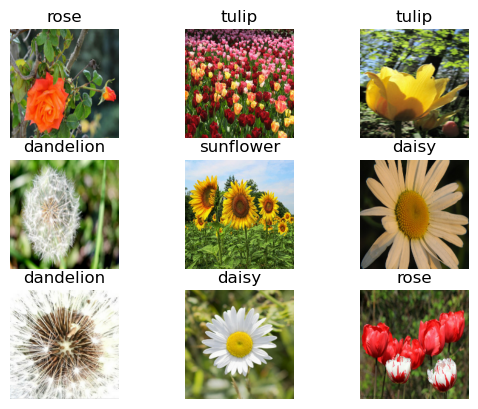

In [35]:
for image ,label in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(flower_name[label[i]])
        plt.axis('off')

In [39]:
for image ,label in train_ds.take(2):
    print(label)

tf.Tensor([2 1 0 2 1 4 2 3 4 2 0 3 3 4 1 4 4 3 3 3 1 2 3 2 3 0 4 0 4 2 0 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 3 4 1 4 4 3 0 4 3 2 3 1 1 1 4 1 3 4 4 3 4 3 2 1 4 4 4 0 4 0], shape=(32,), dtype=int32)


In [41]:
for image ,label in train_ds.take(1):
    print(image)

tf.Tensor(
[[[[5.85750008e+01 6.94638824e+01 3.97972221e+01]
   [5.82833328e+01 6.86166687e+01 4.06166649e+01]
   [5.94249992e+01 6.79805603e+01 4.23138885e+01]
   ...
   [5.23194351e+01 6.83194351e+01 3.13194370e+01]
   [5.38083115e+01 6.94749985e+01 3.18083706e+01]
   [5.60000000e+01 7.10000000e+01 3.20000000e+01]]

  [[5.80000000e+01 6.88888855e+01 3.92222214e+01]
   [5.89083328e+01 6.92416687e+01 4.12416649e+01]
   [6.00000000e+01 6.85555573e+01 4.28888893e+01]
   ...
   [5.32750015e+01 6.72750015e+01 3.12749996e+01]
   [5.44249725e+01 7.00916595e+01 3.10916615e+01]
   [5.62750015e+01 7.12750015e+01 3.22750015e+01]]

  [[5.60000000e+01 6.90000000e+01 3.92222214e+01]
   [5.80000000e+01 6.83333359e+01 4.03333321e+01]
   [5.87777786e+01 6.80000000e+01 4.22777786e+01]
   ...
   [5.61250000e+01 7.07360992e+01 3.29028015e+01]
   [5.40832748e+01 6.97499619e+01 3.07499619e+01]
   [5.70000000e+01 7.20000000e+01 3.30000000e+01]]

  ...

  [[2.50180557e+02 2.29930557e+02 0.00000000e+00]
   [2

In [43]:
for image ,label in train_ds.take(1):
    print(image[0].shape)

(180, 180, 3)


In [45]:
AUTOTUNE=tf.data.AUTOTUNE

In [47]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [49]:
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
data_augmentation = Sequential([
  tf.keras.layers.RandomFlip("horizontal",input_shape=(image_size,image_size,3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1)
])

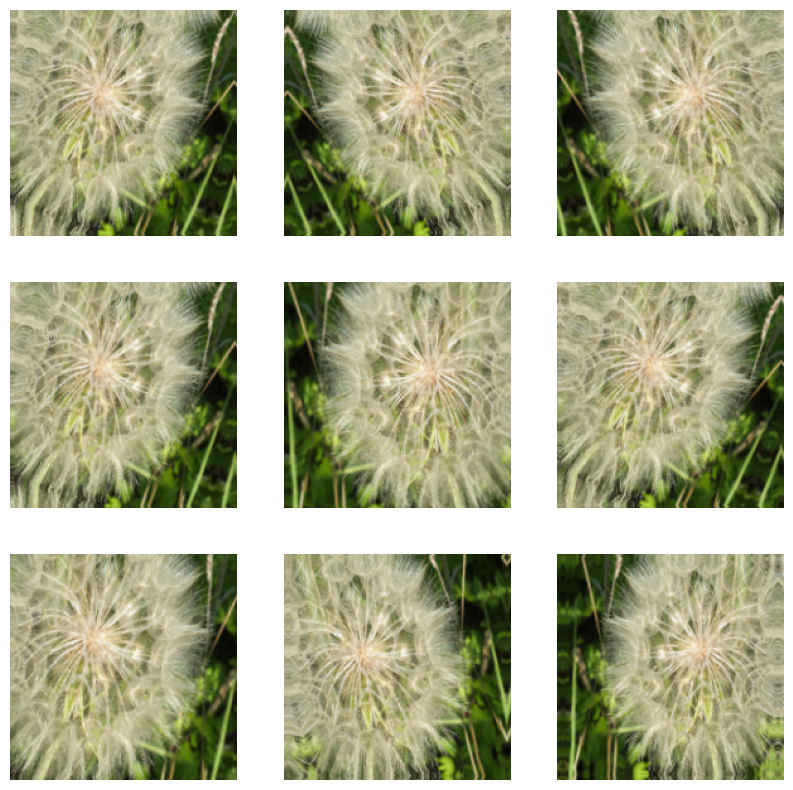

In [55]:

plt.figure(figsize=(10, 10))  # Set the figure size

for images, labels in train_ds.take(1):  # Take one batch of images
    for i in range(9):  # Loop through 9 images
        augmented_image = data_augmentation(images)  # Apply augmentation to a single image
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
        plt.imshow(augmented_image[0].numpy().astype('uint8'))  # Convert and display the image
        plt.axis("off")  # Hide axis for better visualization

plt.show()

In [57]:
model=Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255))
model.add(Conv2D(16,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [61]:
history=model.fit(train_ds,epochs=15,validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 289ms/step - accuracy: 0.4143 - loss: 1.3223 - val_accuracy: 0.5713 - val_loss: 1.0297
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 269ms/step - accuracy: 0.5860 - loss: 1.0486 - val_accuracy: 0.5921 - val_loss: 1.0235
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 285ms/step - accuracy: 0.6259 - loss: 0.9433 - val_accuracy: 0.6501 - val_loss: 0.9077
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 292ms/step - accuracy: 0.6694 - loss: 0.8383 - val_accuracy: 0.6825 - val_loss: 0.8498
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 291ms/step - accuracy: 0.6847 - loss: 0.8172 - val_accuracy: 0.6779 - val_loss: 0.8490
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - accuracy: 0.7183 - loss: 0.7623 - val_accuracy: 0.6848 - val_loss: 0.8222
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.7166 - loss: 0.7385 - val_accuracy: 0.6871 - val_loss: 0.8117
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 273ms/step - accuracy: 0.7233 - loss: 0

In [81]:
input_img=tf.keras.utils.load_img('sample/rose.jpg',target_size=(180,180))
input_img_array=tf.keras.utils.img_to_array(input_img)
input_img__exp_array=tf.expand_dims(input_img_array,0)
pre=model.predict(input_img__exp_array)
pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


array([[ 0.34508556, -7.6873856 ,  5.7746806 , -0.7855285 ,  4.060062  ]],
      dtype=float32)

In [93]:
result=tf.nn.softmax(pre[0])
result

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.6977096e-03, 1.2008114e-06, 8.4328812e-01, 1.1937498e-03,
       1.5181915e-01], dtype=float32)>

In [101]:
np.argmax(result)

2

In [103]:
flower_name[np.argmax(result)]

'rose'

In [105]:
model.save('flower_recog_model.h5')